In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [3]:
temp_df = pd.read_csv("world_population.csv")


# Working with dataset

In [4]:
temp_df.head(10)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.5466,1.0315,0.45
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.2527,1.0066,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.1335,1.0058,0.00
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.3683,1.0052,0.57
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.4831,0.9962,0.03


In [5]:
print('The data set has {} rows and {} columns'.format(temp_df.shape[0],temp_df.shape[1]))

The data set has 234 rows and 17 columns


In [6]:
temp_df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [7]:
print('There are {} unique columns'.format(temp_df.columns.nunique()))

There are 17 unique columns


In [8]:
temp_df = temp_df.rename(columns={'CCA3' : 'Country_code', 'Name' : 'Country_name', 'Area (km²)' : 'Area', 'Density (per km²)' : 'Density'})
temp_df.head()

,Rank,Country_code,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area,Density,Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [9]:
temp_df.drop(['Country_code','Capital','2022 Population','1990 Population','1980 Population','1970 Population'], axis=1, inplace=True)
temp_df.head()

,Rank,Country/Territory,Continent,2020 Population,2015 Population,2010 Population,2000 Population,Area,Density,Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,38972230,33753499,28189672,19542982,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2866849,2882481,2913399,3182021,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,43451666,39543154,35856344,30774621,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,46189,51368,54849,58230,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,77700,71746,71519,66097,468,170.5641,1.0100,0.00


In [10]:
temp_df.sort_values(by=['Rank'],axis=0, ascending=True, inplace=True)
temp_df.head()

,Rank,Country/Territory,Continent,2020 Population,2015 Population,2010 Population,2000 Population,Area,Density,Growth Rate,World Population Percentage
41,1,China,Asia,1424929781,1393715448,1348191368,1264099069,9706961,146.8933,1.0000,17.88
92,2,India,Asia,1396387127,1322866505,1240613620,1059633675,3287590,431.0675,1.0068,17.77
221,3,United States,North America,335942003,324607776,311182845,282398554,9372610,36.0935,1.0038,4.24
93,4,Indonesia,Asia,271857970,259091970,244016173,214072421,1904569,144.6529,1.0064,3.45
156,5,Pakistan,Asia,227196741,210969298,194454498,154369924,881912,267.4018,1.0191,2.96


In [11]:
temp_df.reset_index(inplace=True)
temp_df.head()

,index,Rank,Country/Territory,Continent,2020 Population,2015 Population,2010 Population,2000 Population,Area,Density,Growth Rate,World Population Percentage
0,41,1,China,Asia,1424929781,1393715448,1348191368,1264099069,9706961,146.8933,1.0000,17.88
1,92,2,India,Asia,1396387127,1322866505,1240613620,1059633675,3287590,431.0675,1.0068,17.77
2,221,3,United States,North America,335942003,324607776,311182845,282398554,9372610,36.0935,1.0038,4.24
3,93,4,Indonesia,Asia,271857970,259091970,244016173,214072421,1904569,144.6529,1.0064,3.45
4,156,5,Pakistan,Asia,227196741,210969298,194454498,154369924,881912,267.4018,1.0191,2.96


In [12]:
temp_df.drop(['index'], axis=1, inplace=True)

In [13]:
top_df = temp_df.drop(index=temp_df.index[30:234])
top_df.head()
top_df.tail()


,Rank,Country/Territory,Continent,2020 Population,2015 Population,2010 Population,2000 Population,Area,Density,Growth Rate,World Population Percentage
25,26,Myanmar,Asia,53423198,51483949,49390988,45538332,676578,80.0784,1.0071,0.68
26,27,Kenya,Africa,51985780,46851488,41517895,30851606,580367,93.0919,1.0193,0.68
27,28,Colombia,South America,50930662,47119728,44816108,39215135,1141748,45.4339,1.0069,0.65
28,29,South Korea,Asia,51844690,50994401,48813042,46788591,100210,517.0722,0.9997,0.65
29,30,Spain,Europe,47363807,46431342,46572772,40741651,505992,93.9909,1.0015,0.60


<function matplotlib.pyplot.show(close=None, block=None)>

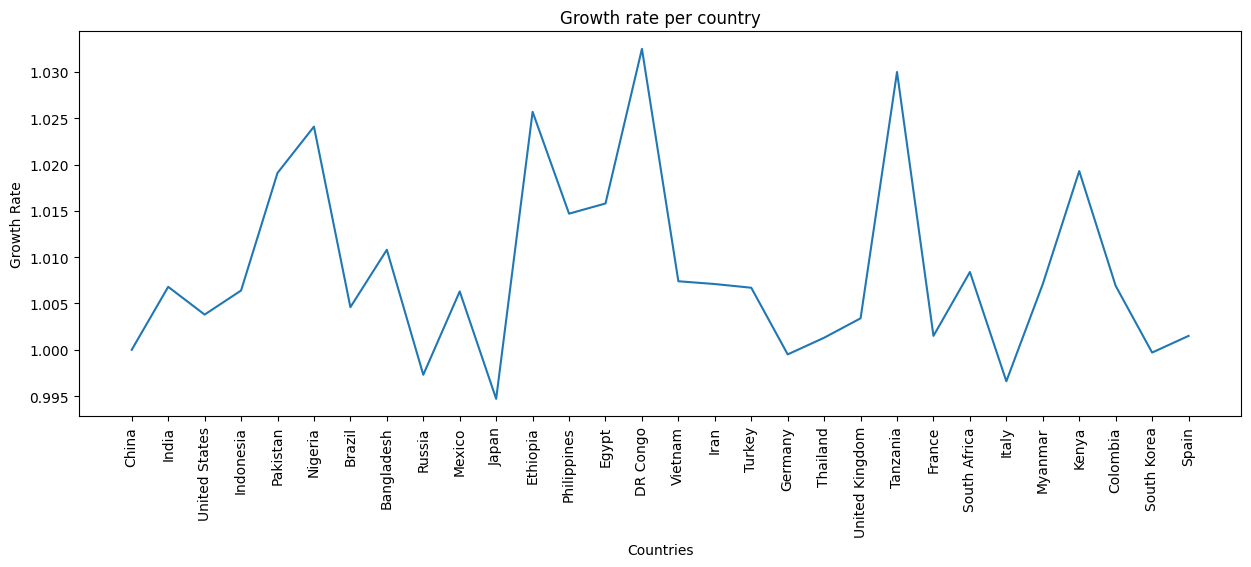

In [14]:
x = top_df['Country/Territory']
y = top_df['Growth Rate']

plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.xlabel('Countries')
plt.ylabel('Growth Rate')
plt.xticks(rotation=90)
plt.title('Growth rate per country')
plt.show

Text(0.5, 1.0, 'Density of top 30 most populated countries')

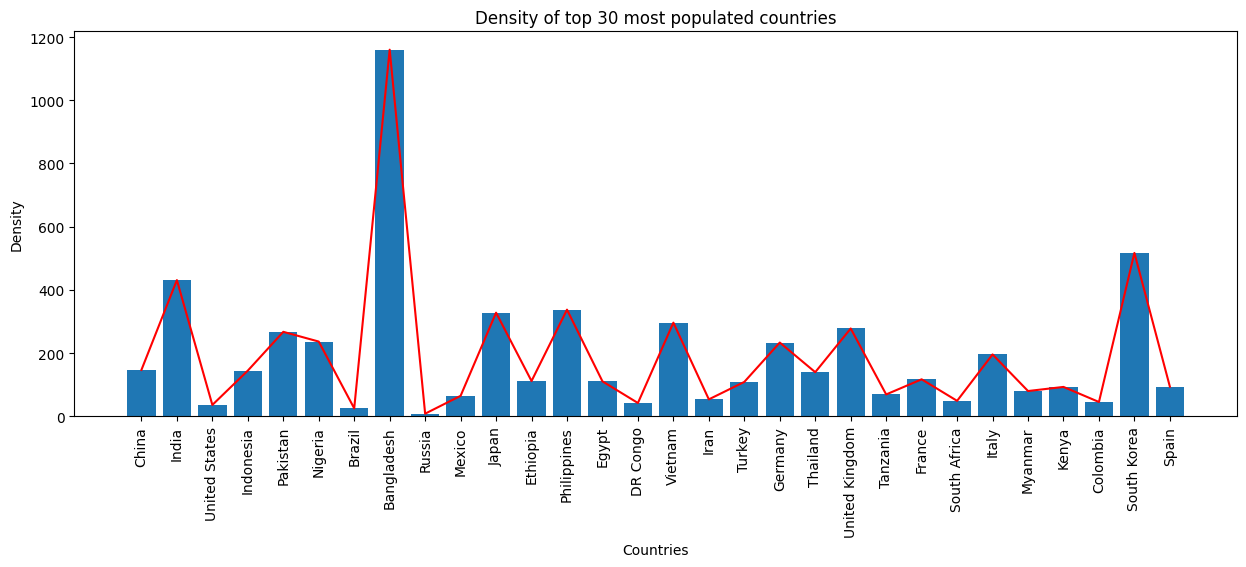

In [15]:
x1 = top_df['Country/Territory']
y1 = top_df['Density']

plt.figure(figsize=(15,5))
plt.plot(x1,y1, c='red')
plt.bar(x1,y1)
plt.xlabel('Countries')
plt.ylabel('Density')
plt.xticks(rotation=90)
plt.title('Density of top 30 most populated countries')

In [16]:
continent_df = temp_df.groupby(by='Continent').sum()
continent_df

C:\Users\abhil\AppData\Local\Temp\ipykernel_13944\620094879.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent_df = temp_df.groupby(by='Continent').sum()


,Rank,2020 Population,2015 Population,2010 Population,2000 Population,Area,Density,Growth Rate,World Population Percentage
Continent,,,,,,,,,
Africa,5253,1360671810,1201102442,1055228072,818946032,30317963,7127.7158,58.2109,17.87
Asia,3878,4663086535,4458250182,4220041327,3735089604,32138141,51251.2068,50.4692,59.19
Europe,6225,745792196,741535608,735613934,726093423,23010411,33166.2371,50.1128,9.33
North America,6437,594236593,570383850,542720651,486069584,24244178,10910.4703,40.1670,7.51
Oceania,4336,43933426,40403283,37102764,31222778,8515081,3048.4905,23.1698,0.55
South America,1366,431530043,413134396,393078250,349634282,17833382,293.6077,14.1114,5.48


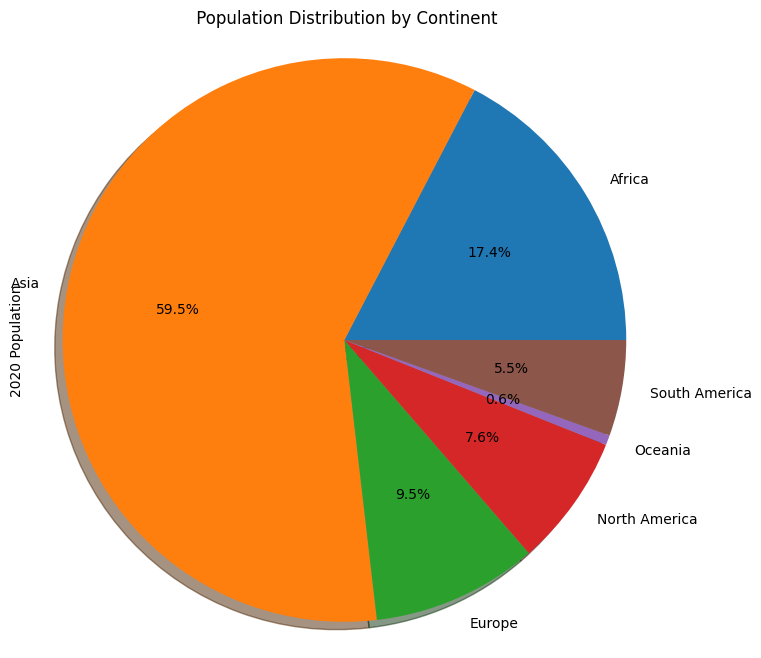

In [17]:
continent_df['2020 Population'].plot(kind='pie', figsize=(8,8), shadow=True, autopct='%1.1f%%') 
plt.title(' Population Distribution by Continent')
plt.axis('equal')
plt.show()

In [18]:
# Asia
asian_countries = temp_df.loc[temp_df["Continent"]=="Asia"].sort_values(by=["2020 Population"], ascending=False, ignore_index=True)

# Africa
african_countries = temp_df.loc[temp_df["Continent"]=="Africa"].sort_values(by=["2020 Population"], ascending=False, ignore_index=True)

# Europe
european_countries = temp_df.loc[temp_df["Continent"]=="Europe"].sort_values(by=["2020 Population"], ascending=False, ignore_index=True)

# North America
na_countries = temp_df.loc[temp_df["Continent"]=="North America"].sort_values(by=["2020 Population"], ascending=False, ignore_index=True)

# Oceania
oc_countries = temp_df.loc[temp_df["Continent"]=="Oceania"].sort_values(by=["2020 Population"], ascending=False, ignore_index=True)

# South America
sa_countries = temp_df.loc[temp_df["Continent"]=="South America"].sort_values(by=["2020 Population"], ascending=False, ignore_index=True)

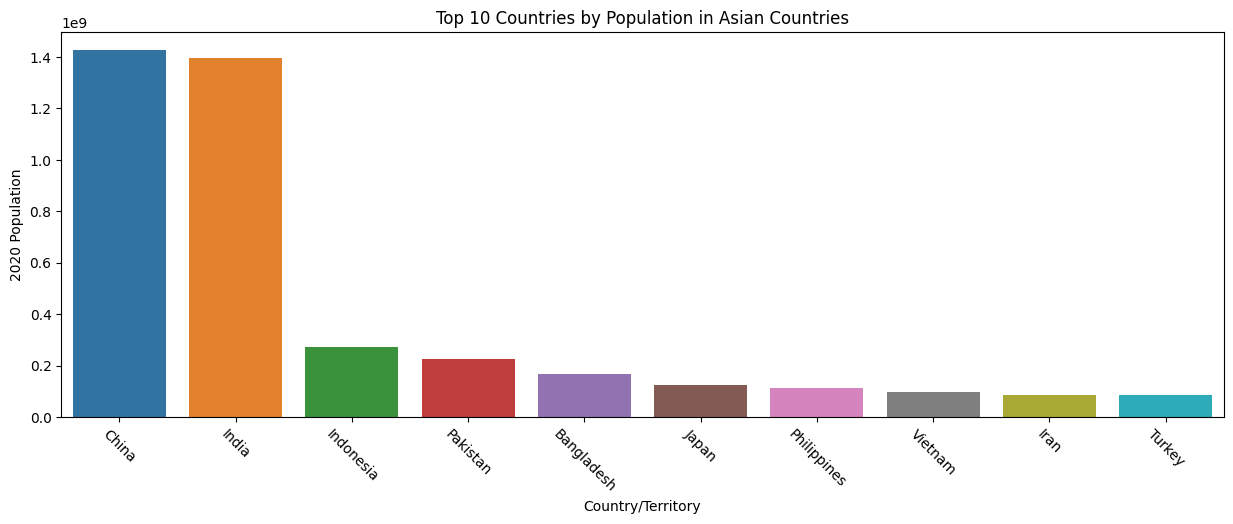

In [19]:
top_10_asian = asian_countries[["Country/Territory", "2020 Population"]].sort_values(by="2020 Population", ascending=False).head(10)

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=top_10_asian, x="Country/Territory", y="2020 Population", ax=ax)
plt.xlabel("Country/Territory")
plt.ylabel("2020 Population")
plt.title("Top 10 Countries by Population in Asian Countries")
plt.xticks(rotation=-45)

plt.show()

In [20]:
top_20_countries = temp_df[['Country/Territory','2020 Population']].sort_values(by='2020 Population', ascending=False).head(20)
top_20_countries

,Country/Territory,2020 Population
0,China,1424929781
1,India,1396387127
2,United States,335942003
3,Indonesia,271857970
4,Pakistan,227196741
6,Brazil,213196304
5,Nigeria,208327405
7,Bangladesh,167420951
8,Russia,145617329
9,Mexico,125998302


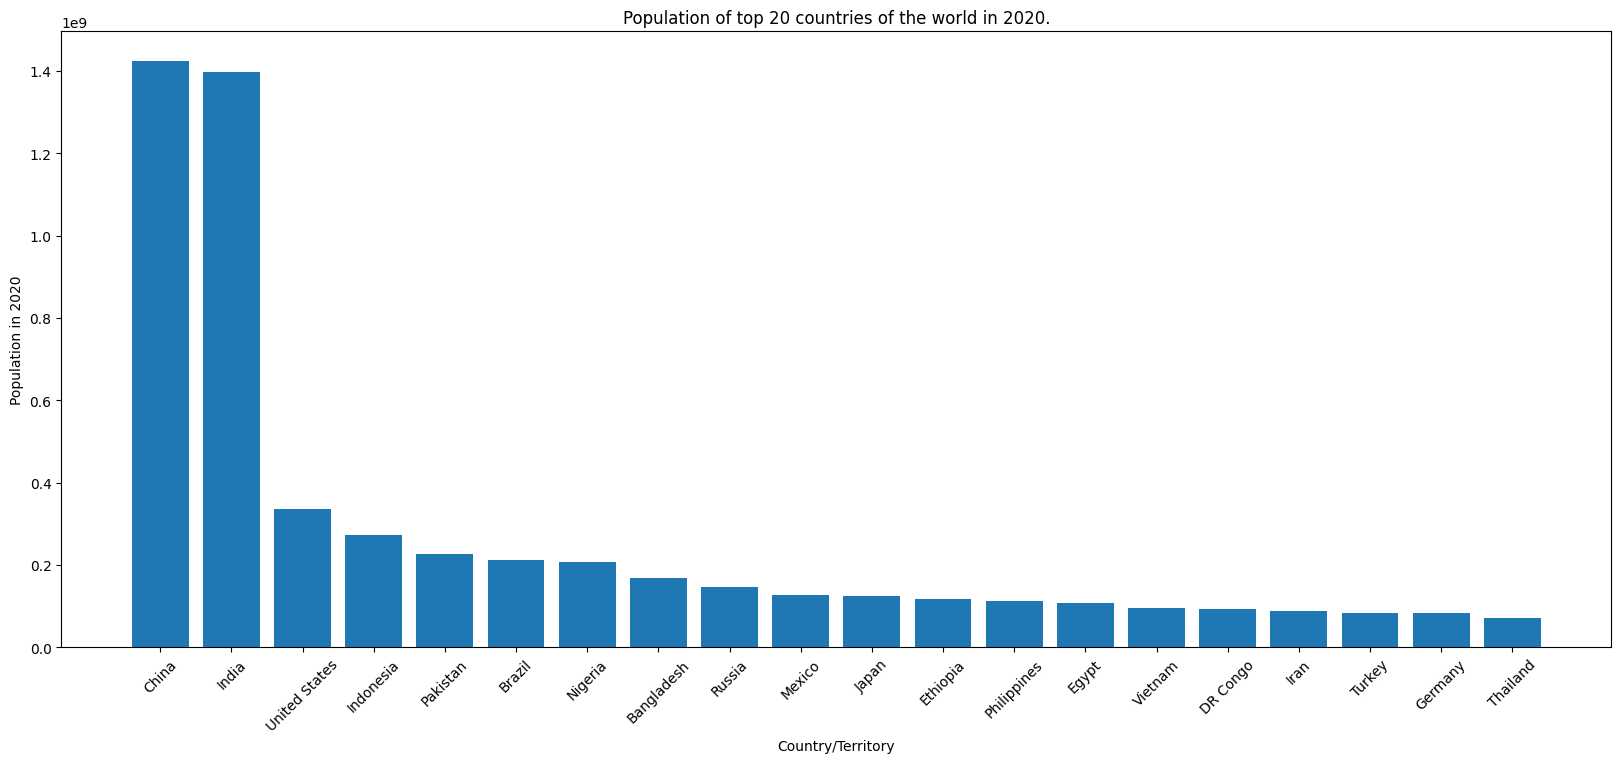

In [21]:
plt.figure(figsize=(20,8))
plt.bar(top_20_countries['Country/Territory'], top_20_countries['2020 Population'])
#plt.plot(top_20_countries['Country/Territory'], top_20_countries['2020 Population'], c='red')
plt.xlabel('Country/Territory')
plt.ylabel('Population in 2020')
plt.title('Population of top 20 countries of the world in 2020.')
plt.xticks(rotation=45)
plt.show()

In [22]:
mean_df = temp_df[['Country/Territory','2020 Population','2015 Population','2010 Population','2000 Population']].mean()
mean_df.head()

C:\Users\abhil\AppData\Local\Temp\ipykernel_13944\3415285690.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_df = temp_df[['Country/Territory','2020 Population','2015 Population','2010 Population','2000 Population']].mean()


2020 Population    3.350107e+07
2015 Population    3.172996e+07
2010 Population    2.984524e+07
2000 Population    2.626947e+07
dtype: float64

In [34]:
top5df = temp_df.head(5)
top5df

,Rank,Country/Territory,Continent,2020 Population,2015 Population,2010 Population,2000 Population,Area,Density,Growth Rate,World Population Percentage
0,1,China,Asia,1424929781,1393715448,1348191368,1264099069,9706961,146.8933,1.0000,17.88
1,2,India,Asia,1396387127,1322866505,1240613620,1059633675,3287590,431.0675,1.0068,17.77
2,3,United States,North America,335942003,324607776,311182845,282398554,9372610,36.0935,1.0038,4.24
3,4,Indonesia,Asia,271857970,259091970,244016173,214072421,1904569,144.6529,1.0064,3.45
4,5,Pakistan,Asia,227196741,210969298,194454498,154369924,881912,267.4018,1.0191,2.96


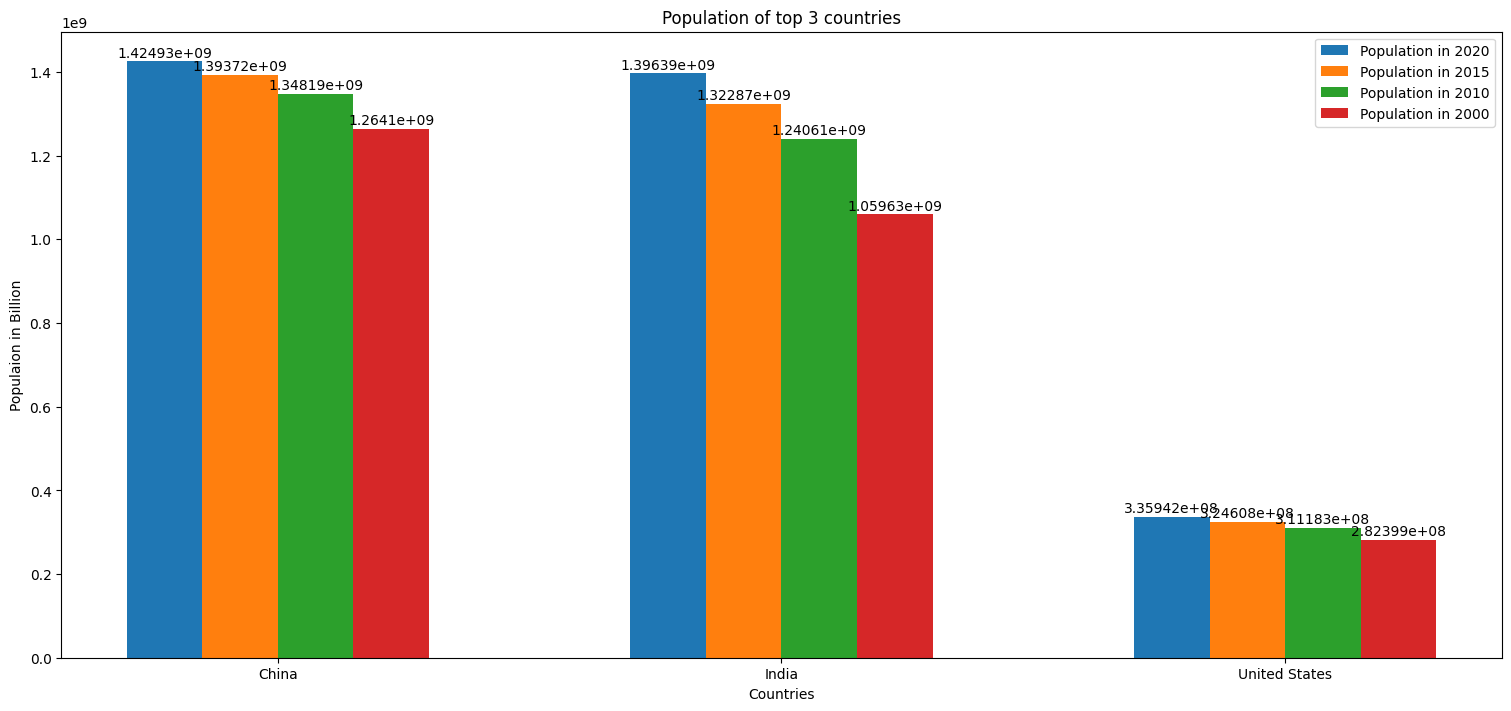

In [87]:
countries = ("China", "India", "United States")
population = {
    'Population in 2020': (1424929782, 1396387127, 335942003),
    'Population in 2015': (1393715448, 1322866505, 324607776),
    'Population in 2010': (1348191368, 1240613620, 311182845),
    'Population in 2000': (1264099069, 1059633675, 282398554)
}

x = np.arange(len(countries))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(15,7))

for attribute, measurement in population.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=1)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Countries')
ax.set_ylabel('Populaion in Billion')
ax.set_title('Population of top 3 countries')
ax.set_xticks(x + 1.5*width, countries)
ax.legend(loc='upper right')

plt.show()